In [38]:

!pip install matplotlib numpy scikit-learn tensorflow


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [40]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [41]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


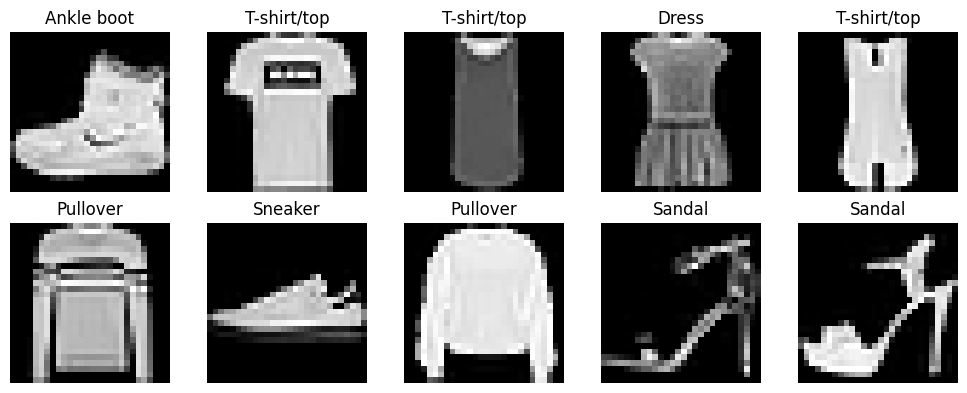

In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [43]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [44]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [45]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
history = model.fit(X_train, y_train_cat, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7753 - loss: 0.6440 - val_accuracy: 0.8447 - val_loss: 0.4297
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8601 - loss: 0.3856 - val_accuracy: 0.8554 - val_loss: 0.3933
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8723 - loss: 0.3484 - val_accuracy: 0.8651 - val_loss: 0.3750
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8817 - loss: 0.3214 - val_accuracy: 0.8771 - val_loss: 0.3362
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8879 - loss: 0.2950 - val_accuracy: 0.8752 - val_loss: 0.3367


In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3696
Test accuracy: 0.8673999905586243


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


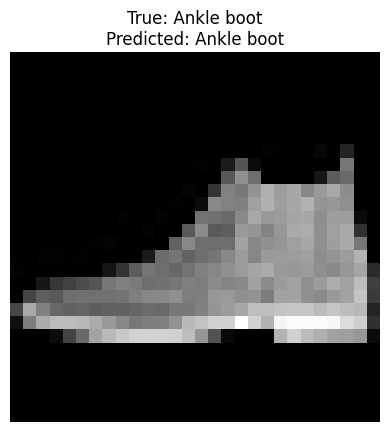

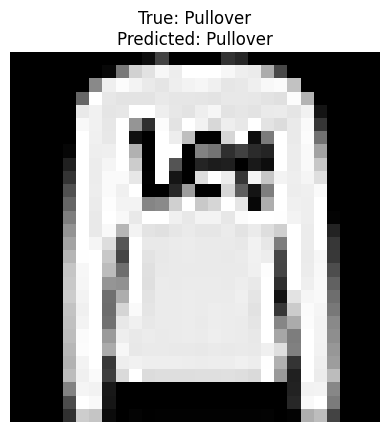

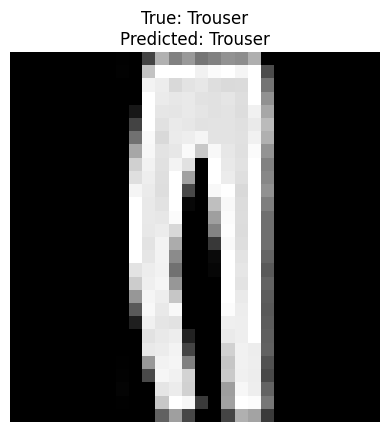

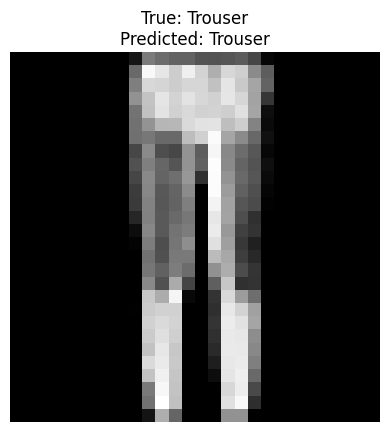

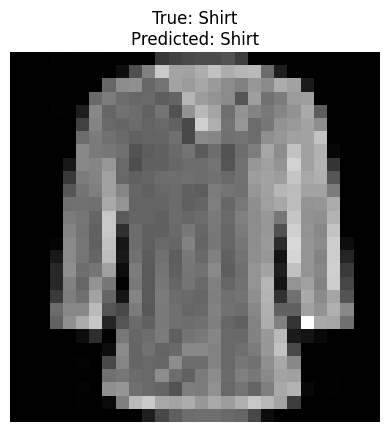

In [48]:
predictions = model.predict(X_test)

for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


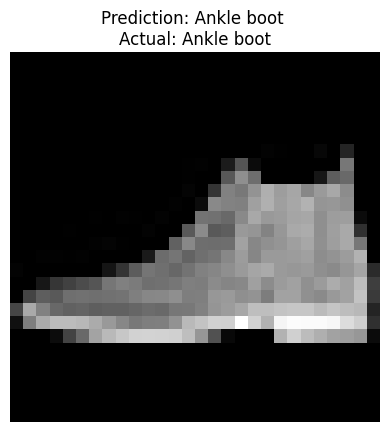

In [49]:
# Example: Predict and show an image
import numpy as np

# Predict on test data
predictions = model.predict(X_test)

# Pick one image to display
index = 0  # you can change this number
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Prediction: {class_names[np.argmax(predictions[index])]} \nActual: {class_names[y_test[index]]}")
plt.axis('off')
plt.show()
